In [2]:
# to measure run-time
import time

# to shuffle data
import random

# for plotting
import matplotlib.pyplot as plt
#from matplotlib.pyplot import cm 

# pytorch stuff
import torch
import torch.nn as nn
import torch.optim as optim

# for csv dataset
import torchvision
import csv
import os
import pandas as pd 
from urllib import request
import requests

# import statements for iterating over csv file
import cv2
import numpy as np
import urllib.request

# to get the alphabet
import string

In [3]:
# Upload and read the csv files from the github repo
# change once get more data
df = pd.read_csv("https://raw.githubusercontent.com/HelenG123/aeye-alliance/master/Labelled%20Data/ting_yi_new_dataset.csv")

In [6]:
# generate the targets 
# the targets are one hot encoding vectors

alphabet = list(string.ascii_lowercase)
target = {}

# Initalize a target dict that has letters as its keys and empty one-hot encoding vectors of size 36 as its values
for letter in alphabet: 
    target[letter] = [0] * 36

# Do the one-hot encoding for each letter now 
curr_pos = 0 
for curr_letter in target.keys():
    target[curr_letter][curr_pos] = 1
    curr_pos += 1  

# extra symbols
# initialize the vectors
target[' '] = [0] * 36 #26
# this is to represent the start of a number
target['#'] = [0] * 36 #27
target['.'] = [0] * 36 #28
target[','] = [0] * 36 #29
target[':'] = [0] * 36 #30
target['\''] = [0] * 36 #31
target['-'] = [0] * 36 #32
target[';'] = [0] * 36 #33
target['?'] = [0] * 36 #34
target['!'] = [0] * 36 #35

# make them into one hot encoding vectors
target[' '][26] = 1
target['#'][27] = 1
target['.'][28] = 1
target[','][29] = 1
target[':'][30] = 1
target['\''][31] = 1
target['-'][32] = 1
target[';'][33] = 1
target['?'][34] = 1
target['!'][35] = 1

print(target)

{'a': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'b': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'c': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'd': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'e': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'f': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'g': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'h': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'i': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
# collect all data from the csv file
data=[]

# iterate over csv file
for i, row in df.iterrows():
    # store the image and label
    picture = []
    url = row['Labeled Data']
    label = row['Label']
    curr_target = target[label[11]]
    x = urllib.request.urlopen(url)
    resp = x.read()
    image = np.array(bytearray(resp), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # resize image to 28x28x3
    image = cv2.resize(image, (28, 28))
    # normalize to 0-1
    image = image.astype(np.float32)/255.0
    image = torch.from_numpy(image)
    picture.append(image)
    # convert the target to a long tensor
    curr_target=torch.LongTensor([curr_target])
    picture.append(curr_target)
    # append the current image & target
    data.append(picture)

In [5]:
# Create dataloader objects

# shuffle all the data
random.shuffle(data)

# batch sizes for train, test, and validation
batch_size_train = 20
batch_size_test = 5
batch_size_validation = 5

# splitting data to get training, test, and validation sets
# change once get more data
# 1124 for train
train_dataset = data[:1124]
# test has 164
test_dataset = data[1124:1264]
# validation has 164
validation_dataset = data[1264:]

# create the dataloader objects
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size_test, shuffle=False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size_validation, shuffle=True)

In [6]:
# defines the convolutional neural network

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.block1 = nn.Sequential(
            #3x28x28
            nn.Conv2d(in_channels=3, 
                      out_channels=16, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2),
            #16x28x28
            nn.MaxPool2d(kernel_size=2),
            #16x14x14
            nn.LeakyReLU()
        )
        #16x14x14
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=16, 
                      out_channels=32, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2),
            #32x14x14
            nn.MaxPool2d(kernel_size=2),
            #32x7x7
            nn.LeakyReLU()
        ) 
        # linearly 
        self.block3 = nn.Sequential(
            nn.Linear(32*7*7, 100),
            nn.LeakyReLU(),
            nn.Linear(100, 36)
        )
        #1x36
    
    def forward(self, x): 
        out = self.block1(x)
        out = self.block2(out)
        # flatten the dataset
        out = out.view(-1, 32*7*7)
        out = self.block3(out)
        
        return out

# convolutional neural network model
model = CNN()

# print summary of the neural network model to check if everything is fine. 
print(model)
print("# parameter: ", sum([param.nelement() for param in model.parameters()]))

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (block3): Sequential(
    (0): Linear(in_features=1568, out_features=100, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=100, out_features=27, bias=True)
  )
)
# parameter:  173675


In [7]:
#setting the learning rate
learning_rate = 1e-3

# Using a variable to store the cross entropy method
criterion = nn.CrossEntropyLoss()

# Using a variable to store the optimizer 
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [8]:
t0 = time.time()

# list of all train_losses 
train_losses = []
# list of all validation losses 
validation_losses = []

# for loop that iterates over all the epochs
num_epochs = 20
for epoch in range(num_epochs):
    
    # variables to store/keep track of the loss and number of iterations
    train_loss = 0
    num_iter_train = 0

    # train the model
    model.train()
    
    # Iterate over train_loader
    for i, (images, labels) in enumerate(train_loader):  
        # need to permute so that the images are of size 3x28x28 
        # essential to be able to feed images into the model
        images = images.permute(0, 3, 1, 2)

        # Zero the gradient buffer
        # resets the gradient after each epoch so that the gradients don't add up
        optimizer.zero_grad()  

        # Forward, get output
        outputs = model(images)

        # convert the labels from one hot encoding vectors into integer values 
        labels = labels.view(-1, 36)
        y_true = torch.argmax(labels, 1)

        # calculate training loss
        loss = criterion(outputs, y_true)
        
        # Backward (computes all the gradients)
        loss.backward()

        # Optimize
        # loops through all parameters and updates weights by using the gradients 
        # takes steps backwards to optimize (to reach the minimum weight)
        optimizer.step()
        # update the training loss and number of iterations
        train_loss += loss.data[0]
        num_iter_train += 1

    print('Epoch: {}'.format(epoch+1))
    print('Training Loss: {:.4f}'.format(train_loss/num_iter_train))
    # append training loss over all the epochs
    train_losses.append(train_loss/num_iter_train)
    
    # variables to store/keep track of the loss and number of iterations
    validation_loss = 0
    num_iter_validation = 0
    
    # Iterate over validation_loader
    for i, (images, labels) in enumerate(validation_loader):  
        # need to permute so that the images are of size 3x28x28 
        # essential to be able to feed images into the model
        images = images.permute(0, 3, 1, 2)

        # Zero the gradient buffer
        # resets the gradient after each epoch so that the gradients don't add up
        optimizer.zero_grad()  

        # Forward, get output
        outputs = model(images)

        # convert the labels from one hot encoding vectors to integer values
        labels = labels.view(-1, 36)
        y_true = torch.argmax(labels, 1)
        
        # calculate the validation loss
        loss = criterion(outputs, y_true)

        # update the training loss and number of iterations
        validation_loss += loss.data[0]
        num_iter_validation += 1

    print('Validation Loss: {:.4f}'.format(validation_loss/num_iter_validation))
    # append all validation_losses over all the epochs
    validation_losses.append(validation_loss/num_iter_validation)
    
    # evaluate the model
    model.eval()

    num_iter_test = 0
    mean = 0
    
    # Iterate over test_loader
    for images, labels in test_loader:  

        # need to permute so that the images are of size 3x28x28 
        # essential to be able to feed images into the model
        images = images.permute(0, 3, 1, 2)

        # Forward
        outputs = model(images)

        # convert the labels from one hot encoding vectors into integer values 
        labels = labels.view(-1, 27)
        y_true = torch.argmax(labels, 1)

        # find the index of the prediction
        y_pred = torch.argmax(outputs, 1).type('torch.FloatTensor')
        # convert to FloatTensor
        y_true = y_true.type('torch.FloatTensor')

        # find the mean difference of the comparisons
        mean += torch.mean(torch.eq(y_true, y_pred).type('torch.FloatTensor'))  

    print('Accuracy on the test set: {:.4f}%'.format(mean/len(test_loader) * 100))
    print()

# calculate time it took to train the model
tf = time.time()
print()
print("time: {} s" .format(tf-t0))

/home/tingyisu/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1
Training Loss: 3.3015
Validation Loss: 3.3034
Accuracy on the test set: 2.8571%


/home/tingyisu/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2
Training Loss: 3.2945
Validation Loss: 3.3040
Accuracy on the test set: 4.2857%
Epoch: 3
Training Loss: 3.1324
Validation Loss: 2.7305
Accuracy on the test set: 28.5714%
Epoch: 4
Training Loss: 1.5131
Validation Loss: 0.9012
Accuracy on the test set: 73.5714%
Epoch: 5
Training Loss: 0.6017
Validation Loss: 0.6061
Accuracy on the test set: 90.7143%
Epoch: 6
Training Loss: 0.3972
Validation Loss: 0.4511
Accuracy on the test set: 87.1429%
Epoch: 7
Training Loss: 0.3138
Validation Loss: 0.2690
Accuracy on the test set: 95.7143%
Epoch: 8
Training Loss: 0.2215
Validation Loss: 0.3828
Accuracy on the test set: 91.4286%
Epoch: 9
Training Loss: 0.2215
Validation Loss: 0.3159
Accuracy on the test set: 90.0000%
Epoch: 10
Training Loss: 0.1754
Validation Loss: 0.2548
Accuracy on the test set: 93.5714%
Epoch: 11
Training Loss: 0.1252
Validation Loss: 0.2469
Accuracy on the test set: 95.0000%
Epoch: 12
Training Loss: 0.0961
Validation Loss: 0.2046
Accuracy on the test set: 95.0000%
Epoch: 1

In [9]:
# learning curve function
def plot_learning_curve(train_losses, validation_losses):
    # plot the training and validation losses
    plt.ylabel('Loss')
    plt.xlabel('Number of Epochs')
    plt.plot(train_losses, label="training")
    plt.plot(validation_losses, label="validation")
    plt.legend(loc=1)

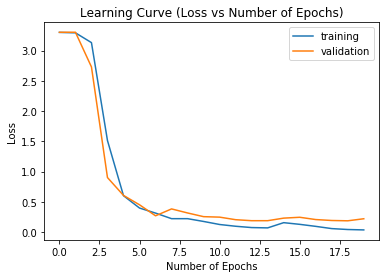

In [10]:
# plot the learning curve
plt.title("Learning Curve (Loss vs Number of Epochs)")
plot_learning_curve(train_losses, validation_losses)